# Evaluación Final Módulo 3

In [1]:
# Tratamiento de datos

import pandas as pd
import numpy as np
import warnings

# Imputación de nulos usando métodos avanzados estadísticos

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización

import seaborn as sns
import matplotlib.pyplot as plt

# Configuración

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
warnings.filterwarnings("ignore")

## Fase 1. Exploración y limpieza

### Exploración csv: 'Customer Flight Activity'

In [2]:
# Cargar csv 'Customer Flight Activity'
df_cfa = pd.read_csv("data/Customer Flight Activity.csv", index_col=0)
df_cfa.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
# Restablecer el índice para convertir 'Loyalty Number' en una columna:
df_cfa.reset_index(inplace=True)
df_cfa.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
# Exploración de columnas: 
df_cfa.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [5]:
# Cantidad de filas y columnas:
print(f"El número de filas que tenemos es {df_cfa.shape[0]}, y el número de columnas es {df_cfa.shape[1]}.")

El número de filas que tenemos es 405624, y el número de columnas es 10.


In [6]:
# Visualización de la estructura:
df_cfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [7]:
# Visualización estadísticas descriptivas de las columnas numéricas:
df_cfa.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [8]:
# Visualización cantidad de valores únicos de todas las columnas:
df_cfa.nunique()

Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

In [9]:
# Exploración de los valores únicos de cada columna:

def print_unique_values(df_cfa):
    for column in df_cfa.columns:
        unique_values = df_cfa[column].unique()
        num_unique = len(unique_values)
        print(f"Columna: {column}")
        print(f"Número de valores únicos: {num_unique}")
        print(f"Valores únicos: {unique_values}")
        print("-" * 40)
print_unique_values(df_cfa)

Columna: Loyalty Number
Número de valores únicos: 16737
Valores únicos: [100018 100102 100140 ... 999731 999788 999891]
----------------------------------------
Columna: Year
Número de valores únicos: 2
Valores únicos: [2017 2018]
----------------------------------------
Columna: Month
Número de valores únicos: 12
Valores únicos: [ 1  9  2  3 11  4  5  7  6  8 10 12]
----------------------------------------
Columna: Flights Booked
Número de valores únicos: 22
Valores únicos: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
----------------------------------------
Columna: Flights with Companions
Número de valores únicos: 12
Valores únicos: [ 0  4  7  1  6  3  5  2 10  8  9 11]
----------------------------------------
Columna: Total Flights
Número de valores únicos: 33
Valores únicos: [ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]
----------------------------------------
Columna: Distance
Número de valores únicos:

In [10]:
# Comprobación de Nulos: 
df_cfa.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [11]:
# Función para explorar el número de duplicados por columna: 

def check_duplicates_in_columns(df_cfa):
   
    for column in df_cfa.columns:
        # Identificar los valores duplicados en la columna
        duplicates = df_cfa[column].duplicated(keep=False)
        
        # Contar el número de duplicados en la columna
        num_duplicates = duplicates.sum()
        
        if num_duplicates > 0:
            print(f"Columna '{column}' tiene {num_duplicates} duplicados.")
        else:
            print(f"Columna '{column}' no tiene duplicados.")
check_duplicates_in_columns(df_cfa)

Columna 'Loyalty Number' tiene 405624 duplicados.
Columna 'Year' tiene 405624 duplicados.
Columna 'Month' tiene 405624 duplicados.
Columna 'Flights Booked' tiene 405624 duplicados.
Columna 'Flights with Companions' tiene 405624 duplicados.
Columna 'Total Flights' tiene 405624 duplicados.
Columna 'Distance' tiene 405300 duplicados.
Columna 'Points Accumulated' tiene 405579 duplicados.
Columna 'Points Redeemed' tiene 405619 duplicados.
Columna 'Dollar Cost Points Redeemed' tiene 405624 duplicados.


In [12]:
# Ordenar el DataFrame por 'Loyalty Number'
df_sorted = df_cfa.sort_values(by='Loyalty Number')

# Filtrar las filas duplicadas en 'Loyalty Number' (única columna que a priori podría ser conflictiva en términos de duplicados):
duplicates = df_sorted[df_sorted.duplicated(subset='Loyalty Number', keep=False)]

duplicates.head(20)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
169010,100018,2017,11,13,1,14,3374,337.0,0,0
135208,100018,2017,9,9,4,13,1651,165.0,0,0
50703,100018,2017,4,4,0,4,924,92.0,0,0
287317,100018,2018,6,0,0,0,0,0.0,0,0
152109,100018,2017,10,6,0,6,1032,103.0,0,0
213311,100018,2017,3,14,3,17,2533,253.0,438,36
371822,100018,2018,11,11,0,11,3058,305.0,0,0
388723,100018,2018,12,17,6,23,4945,494.0,0,0
185911,100018,2017,12,6,0,6,1908,190.0,0,0
338020,100018,2018,9,14,2,16,3568,356.0,0,0


!!! Se decide no eliminar duplicados, ya que es necesario mantener los distintos registros de las distintas fechas !!!

### EXPLORACIÓN 'Customer Loyalty History'

In [13]:
# Cargar csv 'Customer Loyalty History':
df_clh = pd.read_csv("data/Customer Loyalty History.csv")
df_clh.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [14]:
# Exploración de columnas:
df_clh.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [15]:
# Cantidad de filas y columnas:
print(f"El número de filas que tenemos es {df_clh.shape[0]}, y el número de columnas es {df_clh.shape[1]}")

El número de filas que tenemos es 16737, y el número de columnas es 16


In [16]:
# Visualización de la estructura:

df_clh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [17]:
# Visualización estadísticas descriptivas de las columnas numéricas:
df_clh.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [18]:
# Visualización estadísticas descriptivas de las columnas categóricas o tipo object:
df_clh.describe(include="object").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [19]:
# Visualicación cantidad de valores únicos de cada columna:
df_clh.nunique()

Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

In [20]:
# Función para explorar los valores únicos de cada columna:

def print_unique_values(df_clh):
    for column in df_clh.columns:
        unique_values = df_clh[column].unique()
        num_unique = len(unique_values)
        print(f"Columna: {column}")
        print(f"Número de valores únicos: {num_unique}")
        print(f"Valores únicos: {unique_values}")
        print("-" * 40)
print_unique_values(df_clh)

Columna: Loyalty Number
Número de valores únicos: 16737
Valores únicos: [480934 549612 429460 ... 776187 906428 652627]
----------------------------------------
Columna: Country
Número de valores únicos: 1
Valores únicos: ['Canada']
----------------------------------------
Columna: Province
Número de valores únicos: 11
Valores únicos: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
----------------------------------------
Columna: City
Número de valores únicos: 29
Valores únicos: ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
----------------------------------------
Columna: Postal Code
Número de

In [21]:
# Comprobación de nulos:
df_clh.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [22]:
# Comprobar que en la columna Loyalty Number (única columna que podría ser conflictiva en términos de duplicados) todos los valores son únicos:
num_duplicates = df_clh['Loyalty Number'].duplicated().sum()
print(f"Número de valores duplicados en 'Loyalty Number': {num_duplicates}")

Número de valores duplicados en 'Loyalty Number': 0


## 1.2. Transformación y Limpieza: 

In [23]:
# Unir las columnas 'Year' y 'Month' de 'df_cfa' en una columna de tipo datetime: 

df_cfa['Date'] = pd.to_datetime(df_cfa['Year'].astype(str) + '-' + df_cfa['Month'].astype(str) + '-01')

# Eliminar las columnas originales de 'Year' y 'Month':

df_cfa.drop(columns=['Year', 'Month'], inplace=True)

df_cfa.head()

,Loyalty Number,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Date
0,100018,3,0,3,1521,152.0,0,0,2017-01-01
1,100102,10,4,14,2030,203.0,0,0,2017-01-01
2,100140,6,0,6,1200,120.0,0,0,2017-01-01
3,100214,0,0,0,0,0.0,0,0,2017-01-01
4,100272,0,0,0,0,0.0,0,0,2017-01-01


In [24]:
# Función para unir columnas del 'df_clh' en una columna de tipo date time y eliminar las originales:

def create_date_columns(df_clh, enrollment_year_col, enrollment_month_col, cancellation_year_col, cancellation_month_col):
    df_clh['Enrollment Date'] = pd.to_datetime(df_clh[enrollment_year_col].astype(str) + '-' + df_clh[enrollment_month_col].astype(str) + '-01', errors='coerce')
    df_clh['Cancellation Date'] = pd.to_datetime(df_clh[cancellation_year_col].astype('Int64').astype(str) + '-' + df_clh[cancellation_month_col].astype('Int64').astype(str) + '-01', errors='coerce')
    df_clh.drop(columns=[enrollment_year_col, enrollment_month_col, cancellation_year_col, cancellation_month_col], inplace=True)

    return df_clh

df_clh = create_date_columns(df_clh, 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month')
df_clh.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Date,Cancellation Date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016-02-01,NaT
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016-03-01,NaT
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014-07-01,2018-01-01
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013-02-01,NaT
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014-10-01,NaT


In [25]:
# Cambiar tipo de dato de columnas de 'df_cfa':

columns_to_convert = ['Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']
df_cfa[columns_to_convert] = df_cfa[columns_to_convert].astype(float)
df_cfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Loyalty Number               405624 non-null  int64         
 1   Flights Booked               405624 non-null  int64         
 2   Flights with Companions      405624 non-null  int64         
 3   Total Flights                405624 non-null  int64         
 4   Distance                     405624 non-null  float64       
 5   Points Accumulated           405624 non-null  float64       
 6   Points Redeemed              405624 non-null  float64       
 7   Dollar Cost Points Redeemed  405624 non-null  float64       
 8   Date                         405624 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 27.9 MB


In [26]:
# Cambiar tipo de dato de las columnas de df_clh:

categorical_columns = ['Country', 'Province', 'City', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type']
df_clh[categorical_columns] = df_clh[categorical_columns].astype('category')
df_clh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Loyalty Number     16737 non-null  int64         
 1   Country            16737 non-null  category      
 2   Province           16737 non-null  category      
 3   City               16737 non-null  category      
 4   Postal Code        16737 non-null  object        
 5   Gender             16737 non-null  category      
 6   Education          16737 non-null  category      
 7   Salary             12499 non-null  float64       
 8   Marital Status     16737 non-null  category      
 9   Loyalty Card       16737 non-null  category      
 10  CLV                16737 non-null  float64       
 11  Enrollment Type    16737 non-null  category      
 12  Enrollment Date    16737 non-null  datetime64[ns]
 13  Cancellation Date  2067 non-null   datetime64[ns]
dtypes: cat

In [27]:
# Calcular los porcentajes de nulos para valorar la imputación:

total_rows =len(df_clh)
null_counts = df_clh.isnull().sum()
null_counts_filtered = null_counts[null_counts > 0]
null_percentages = (null_counts_filtered/ total_rows) * 100
null_percentages

Salary               25.321145
Cancellation Date    87.650117
dtype: float64

In [28]:
# Filtra las filas donde 'Salary' es nulo y contar la cantidad de valores nulos en 'Salary' por cada categoría de 'Education':

nulos_salary = df_clh[df_clh['Salary'].isnull()]
categoria_nulos = nulos_salary['Education'].value_counts()

print("Categorías de 'Education' con valores nulos en 'Salary':")
print(categoria_nulos)

Categorías de 'Education' con valores nulos en 'Salary':
Education
College                 4238
Bachelor                   0
Doctor                     0
High School or Below       0
Master                     0
Name: count, dtype: int64


In [29]:
# Imputar con 0 los nulos de la columna "Salary", ya que corresponden a la categoría "College" de la columna "Education" y se entiende que no tienen salario: 

df_clh.loc[df_clh['Education'] == 'College', 'Salary'] = df_clh.loc[df_clh['Education'] == 'College', 'Salary'].fillna(0)
df_clh.isnull().sum()

Loyalty Number           0
Country                  0
Province                 0
City                     0
Postal Code              0
Gender                   0
Education                0
Salary                   0
Marital Status           0
Loyalty Card             0
CLV                      0
Enrollment Type          0
Enrollment Date          0
Cancellation Date    14670
dtype: int64

In [30]:
#Calcular la cantidad de valores negativos en la columna "Salary":

negative_count = (df_clh['Salary'] < 0).sum()
negative_count

np.int64(20)

In [31]:
# Mostrar los registros con valores negativos en la columna "Salary":

negative_salaries = df_clh[df_clh['Salary'] < 0]
negative_salaries

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Date,Cancellation Date
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018-03-01,NaT
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018-03-01,NaT
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018-03-01,NaT
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018-03-01,NaT
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018-03-01,NaT
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018-03-01,NaT
6560,115505,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018-04-01,NaT
6570,430398,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018-03-01,NaT
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018-02-01,NaT
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018-02-01,NaT


In [32]:
# Convertir los valores negativos a positivos usando numpy (Por el tipo de valores que se observan, se interpreta que ha habido un problema de introducción de datos):

df_clh['Salary'] = np.abs(df_clh['Salary'])

#----> También se podría hacer con apply: df_clh['Salary'] = df_clh['Salary'].apply(lambda x: abs(x))

In [33]:
# Convertir los valores nulos de la columna "Cancellation Date" a "-", ya que se interpreta que sigue vigente:

df_clh['Cancellation Date'] = df_clh['Cancellation Date'].fillna('-')
print("Número de nulos en 'Cancellation Date' después de imputación:", df_clh['Cancellation Date'].isnull().sum())

Número de nulos en 'Cancellation Date' después de imputación: 0


In [34]:
# Unión de los csv:

df_cfalh = pd.merge(df_cfa, df_clh, on='Loyalty Number', how='inner')
df_cfalh.head()

,Loyalty Number,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Date,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Date,Cancellation Date
0,100018,3,0,3,1521.0,152.0,0.0,0.0,2017-01-01,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016-08-01,-
1,100102,10,4,14,2030.0,203.0,0.0,0.0,2017-01-01,Canada,Ontario,Toronto,M1R 4K3,Male,College,0.0,Single,Nova,2887.74,Standard,2013-03-01,-
2,100140,6,0,6,1200.0,120.0,0.0,0.0,2017-01-01,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,0.0,Divorced,Nova,2838.07,Standard,2016-07-01,-
3,100214,0,0,0,0.0,0.0,0.0,0.0,2017-01-01,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015-08-01,-
4,100272,0,0,0,0.0,0.0,0.0,0.0,2017-01-01,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014-01-01,-


## FASE 2. Visualización

2.1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

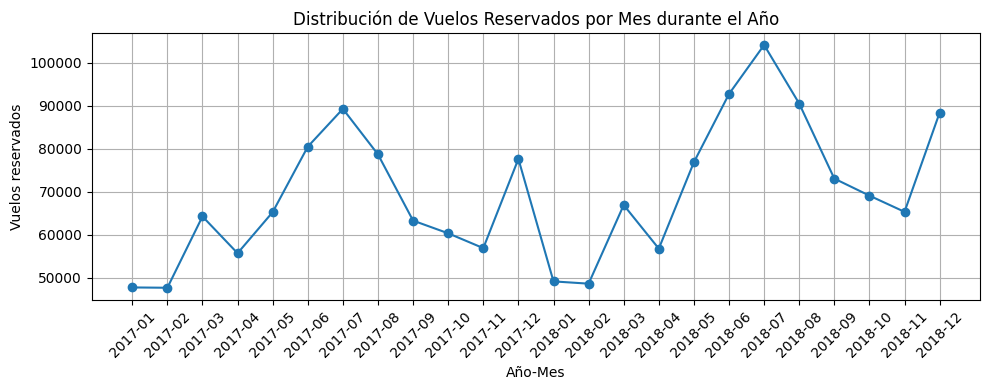

In [35]:
# Crear una columna 'Year-Month' para el análisis mensual:

df_cfalh['Year-Month'] = df_cfalh['Date'].dt.to_period('M') 

# Agrupar por mes y sumar la cantidad de vuelos reservados:

monthly_flights = df_cfalh.groupby('Year-Month')['Flights Booked'].sum().reset_index()

# Gráfico:

plt.figure(figsize=(10, 4))

plt.plot(monthly_flights['Year-Month'].astype(str), monthly_flights['Flights Booked'], marker='o', linestyle='-')

plt.xlabel('Año-Mes')
plt.ylabel('Vuelos reservados')
plt.title('Distribución de Vuelos Reservados por Mes durante el Año')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.grid(True)

plt.tight_layout() # Márgenes
plt.show()


- Estacionalidad: Los picos de vuelos reservados en los meses de verano y Navidad indican un mayor número de reservas durante ciertos períodos del año que implican vacaciones o festividades.

2.2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [36]:
# Calcular la correlación de Pearson entre distancia y puntos acumulados:

correlation = df_cfalh['Distance'].corr(df_cfalh['Points Accumulated'])

print(f'Correlación entre Distance y Points Accumulated: {correlation:.2f}')

Correlación entre Distance y Points Accumulated: 0.99


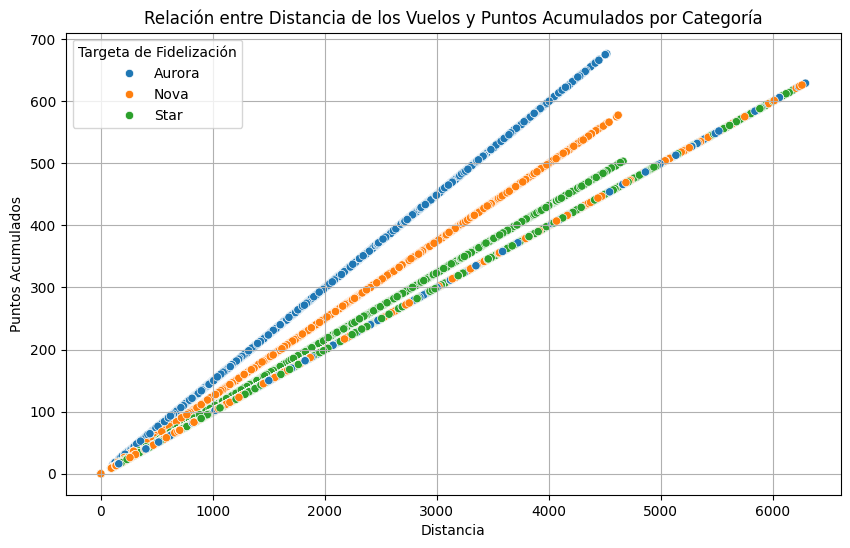

In [37]:
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión con color por la categoría Loyalty Card:

sns.scatterplot(data=df_cfalh, x='Distance', y='Points Accumulated', hue='Loyalty Card')

plt.xlabel('Distancia')
plt.ylabel('Puntos Acumulados')
plt.title('Relación entre Distancia de los Vuelos y Puntos Acumulados por Categoría')
plt.legend(title='Targeta de Fidelización')
plt.grid(True)

plt.show()


- Relación positiva: las diferentes categorías de tarjetas pueden mostrar variaciones en la cantidad de puntos acumulados por distancia, pero todas muestran una tendencia general de mayor acumulación de puntos con una mayor distancia. 
- Esto sugiere que hay una diferencia en la generosidad de las recompensas entre los tipos de tarjeta.


3. ¿Cuál es la distribución de los clientes por provincia o estado?

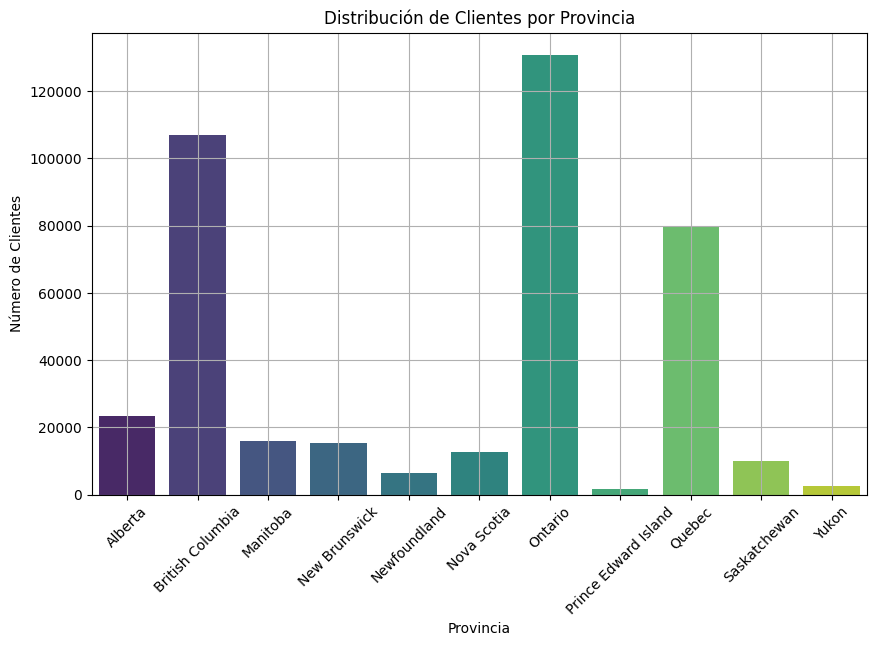

In [38]:
# Número de clientes por Provincia
provincia_counts = df_cfalh['Province'].value_counts()

# Convertir a DataFrame para facilitar la visualización
provincia_df = provincia_counts.reset_index()
provincia_df.columns = ['Province', 'Number of Clients']

# Gráfico:
plt.figure(figsize=(10, 6))

sns.barplot(data=provincia_df, x='Province', y='Number of Clients', palette='viridis')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Provincia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje 
plt.grid(True)

plt.show()

- El gráfico simplemente revela las provincias con mayor número de clientes. 
- Las provincias con un alto número de clientes podrían ser el foco para estrategias de marketing y servicio, mientras que provincias con menos clientes podrían necesitar esfuerzos adicionales para aumentar la base de clientes.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

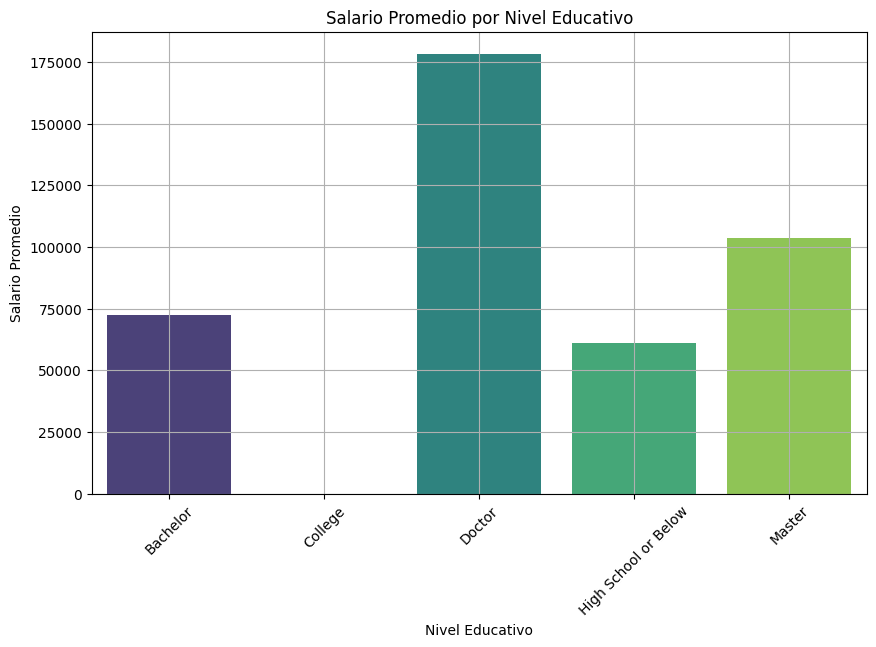

In [39]:
# Salario promedio por nivel educativo
salary_by_education = df_cfalh.groupby('Education')['Salary'].mean().reset_index()

# Renombrar las columnas
salary_by_education.columns = ['Education', 'Average Salary']

# Gráfico:
plt.figure(figsize=(10, 6))

sns.barplot(data=salary_by_education, x='Education', y='Average Salary', palette='viridis')

plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.title('Salario Promedio por Nivel Educativo')
plt.xticks(rotation=45) 
plt.grid(True)

plt.show()

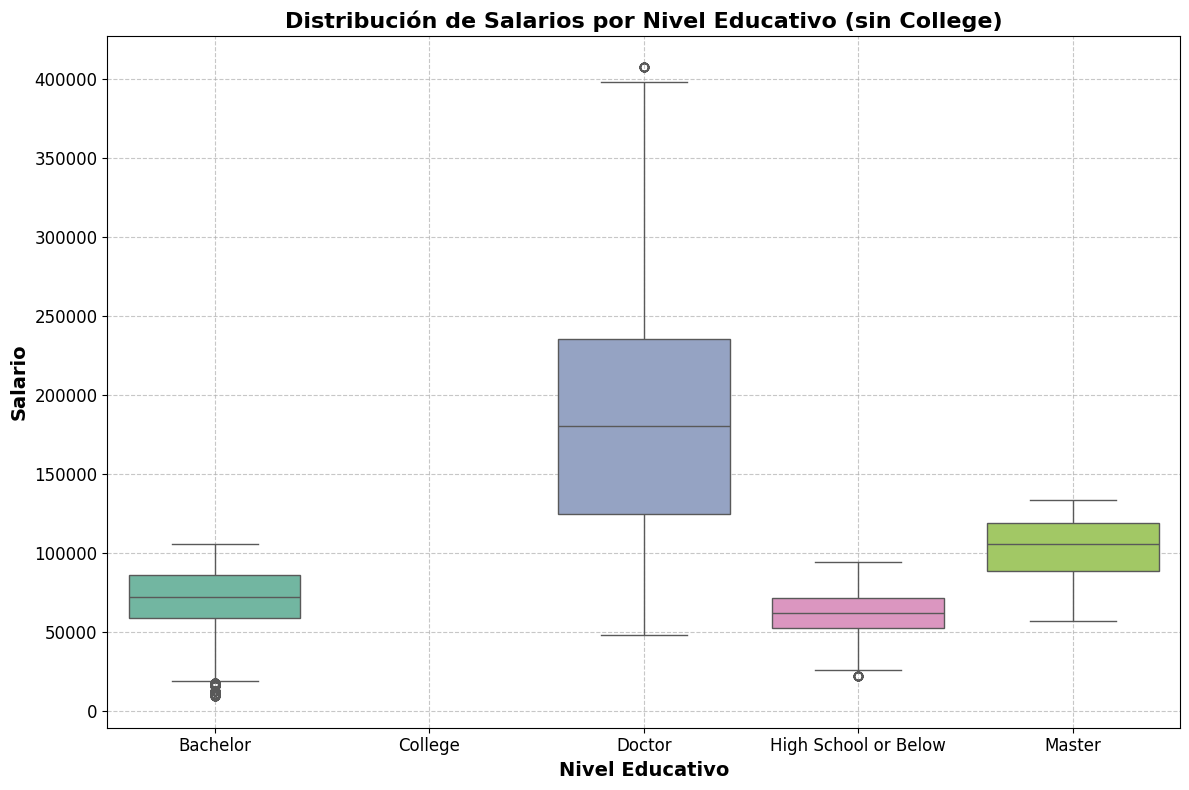

In [40]:
# Boxplot:

df_filtered = df_cfalh[df_cfalh['Education'] != 'College']

plt.figure(figsize=(12, 8))

sns.boxplot(data=df_filtered, x='Education', y='Salary', palette='Set2')

plt.xlabel('Nivel Educativo', fontsize=14, fontweight='bold')
plt.ylabel('Salario', fontsize=14, fontweight='bold')
plt.title('Distribución de Salarios por Nivel Educativo (sin College)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- Se observan diferencias significativas entre los salarios promedio de diferentes niveles educativos, reflejando cómo un nivel más alto de educación (Doctor) influye positivamente en el nivel de ingresos.
- Utilizando el boxplot se pueden apreciar los outliers que corresponden a los salarios atípicos más bajos en el caso de "Bachelor" y "High School or Below", así como los outliers con valores que representan salarios atípicos más altos, como es el caso de la categoría "Doctor". 

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

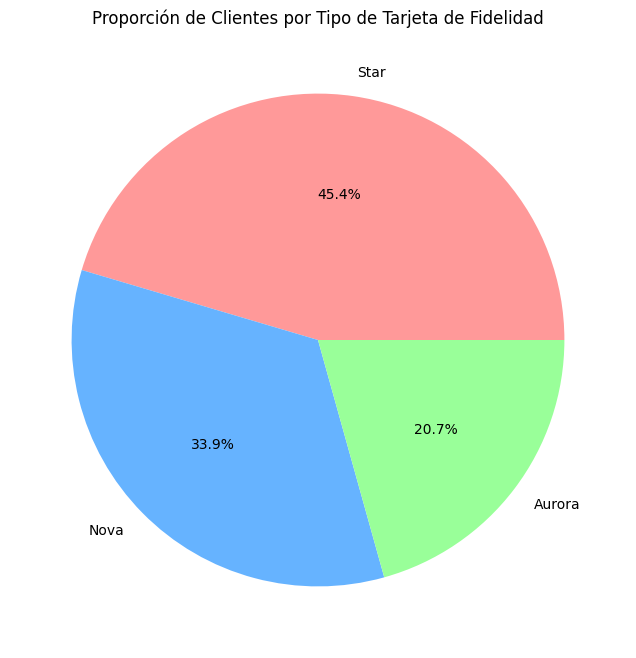

In [41]:
# Número de clientes por tipo de tarjeta
loyalty_card_counts = df_cfalh['Loyalty Card'].value_counts()

# Calcular las proporciones
loyalty_card_proportions = loyalty_card_counts / loyalty_card_counts.sum()

# Gráfico
plt.figure(figsize=(8, 8))

plt.pie(loyalty_card_proportions, labels=loyalty_card_proportions.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')

plt.show()

- Se puede identificar que la targeta Star tiene la mayor proporción de clientes. 
- Como se puede comprobar en el gráfico 'Relación entre Distancia de los Vuelos y Puntos Acumulados por Categoría', seguramente es debido a que es la targeta con un coste más bajo. 
- A priori se podría concluir que los beneficios de la targeta Aurora no compensan su precio, en relación con las targetas de menor categoría.

6. ¿ Cómo se distribuyen los clientes según su estado civil y género?

Tabla de Contingencia:
Gender          Female    Male
Marital Status                
Divorced         30888   30288
Married         117816  117984
Single           54936   53712


<Figure size 1000x600 with 0 Axes>

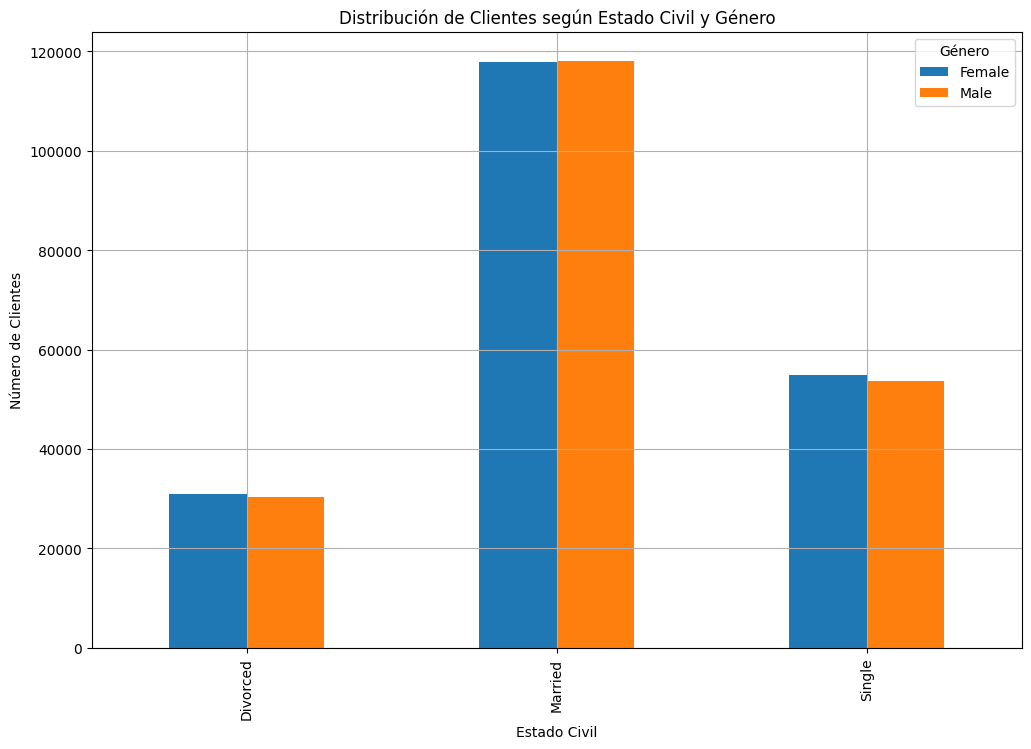

In [42]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(index=df_cfalh['Marital Status'], columns=df_cfalh['Gender'])

# Mostrar la tabla de contingencia
print("Tabla de Contingencia:")
print(contingency_table)

# Gráfico
plt.figure(figsize=(10, 6))

contingency_table.plot(kind='bar', figsize=(12, 8))

plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes según Estado Civil y Género')
plt.legend(title='Género')
plt.grid(True)

plt.show()



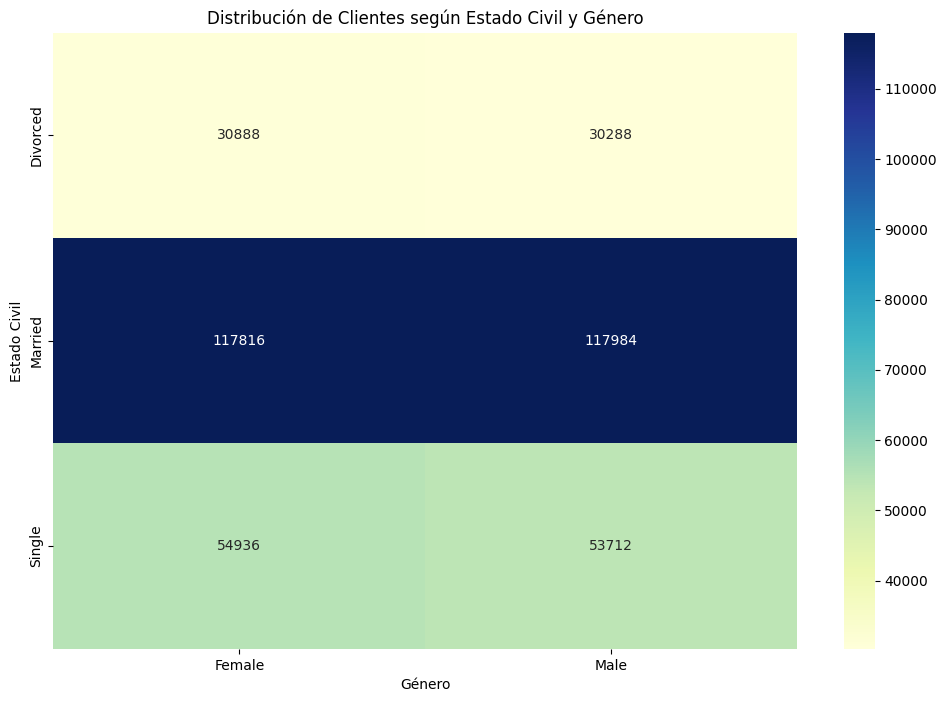

In [43]:
# Heatmap:

contingency_table = pd.crosstab(index=df_cfalh['Marital Status'], columns=df_cfalh['Gender'])

plt.figure(figsize=(12, 8))

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')

plt.xlabel('Género')
plt.ylabel('Estado Civil')
plt.title('Distribución de Clientes según Estado Civil y Género')
plt.show()


- Se observa como no hay diferencias significativas entre géneros en las distintas categorías. 
- El mayor número de clientes corresponde a la categoría de casados, mientras que el menor número de clientes corresponde a la categoría de divorciados. 
- La diferencia de cantidades de clientes entre categorías es significativa, sobretodo para la categoría de casados. Esto podría indicar que las personas casadas tienden a contratar programas de fidelización. 

## FASE 3. Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

- Hipótesis:

    - H0​: No hay una diferencia significativa en el número promedio de vuelos reservados entre los grupos de "Secondary Education" y "Higher Education".
    - H1​: Hay una diferencia significativa en el número promedio de vuelos reservados entre los grupos de "Secondary Education" y "Higher Education".

- Preparación de los datos:

In [44]:
# Agrupar niveles educativos
group_a = ['High School', 'College']  # Educación secundaria
group_b = ['Bachelor', 'Master', 'Doctorate']  # Educación superior

# Crear una nueva columna para el grupo
df_cfalh['Education Group'] = df_cfalh['Education'].apply(lambda x: 'Secondary Education' if x in group_a else 'Higher Education')

# Filtrar el DataFrame para incluir solo las columnas relevantes
df_ab_test = df_cfalh[['Flights Booked', 'Education Group']]

- Visualización estadísticas descriptivas de ambos grupos:

In [45]:
# Calcular estadísticas descriptivas por grupo de educación
descriptive_stats_ab = df_ab_test.groupby('Education Group')['Flights Booked'].describe()
descriptive_stats_ab

,count,mean,std,min,25%,50%,75%,max
Education Group,,,,,,,,
Higher Education,302952.0,4.102188,5.219821,0.0,0.0,1.0,8.0,21.0
Secondary Education,102672.0,4.153012,5.242136,0.0,0.0,1.0,8.0,21.0


- Pruebas de Normalidad:

In [46]:
from scipy.stats import shapiro

# Filtrar los datos por grupo
group_a_data = df_ab_test[df_ab_test['Education Group'] == 'Secondary Education']['Flights Booked']
group_b_data = df_ab_test[df_ab_test['Education Group'] == 'Higher Education']['Flights Booked']

# Valor predeterminado de alpha
alpha = 0.05

# Prueba de normalidad para el Grupo A
stat_a, p_value_a = shapiro(group_a_data)
normality_a = "normal" if p_value_a > alpha else "no normal"
print(f"Grupo A - Prueba de Normalidad Shapiro-Wilk p-value: {p_value_a:.4e} (Resultado: {normality_a})")

# Prueba de normalidad para el Grupo B
stat_b, p_value_b = shapiro(group_b_data)
normality_b = "normal" if p_value_b > alpha else "no normal"
print(f"Grupo B - Prueba de Normalidad Shapiro-Wilk p-value: {p_value_b:.4e} (Resultado: {normality_b})")


Grupo A - Prueba de Normalidad Shapiro-Wilk p-value: 2.7548e-134 (Resultado: no normal)
Grupo B - Prueba de Normalidad Shapiro-Wilk p-value: 3.5534e-159 (Resultado: no normal)


- Visualización distribución no normal:

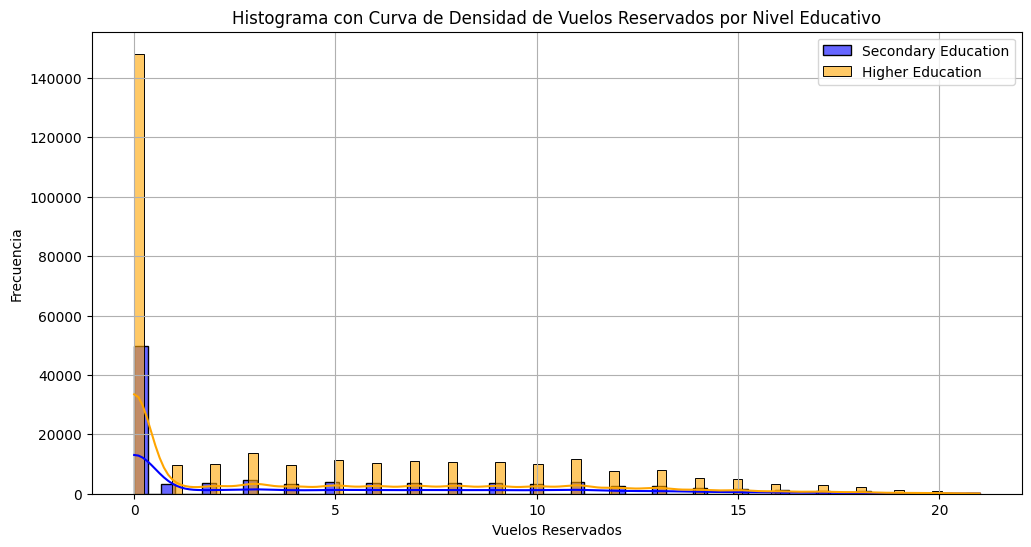

In [47]:
plt.figure(figsize=(12, 6))

# Histograma y curva de densidad para el Grupo A
sns.histplot(df_ab_test[df_ab_test['Education Group'] == 'Secondary Education']['Flights Booked'], kde=True, label='Secondary Education', color='blue', alpha=0.6)
sns.histplot(df_ab_test[df_ab_test['Education Group'] == 'Higher Education']['Flights Booked'], kde=True, label='Higher Education', color='orange', alpha=0.6)

# Configurar etiquetas y título
plt.xlabel('Vuelos Reservados')
plt.ylabel('Frecuencia')
plt.title('Histograma con Curva de Densidad de Vuelos Reservados por Nivel Educativo')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

- Como la distribución de datos no es normal, se utiliza la prueba no paramétrica de Mann-Whitney U:

In [48]:
from scipy.stats import mannwhitneyu

# Prueba de Mann-Whitney U
u_stat, p_value = mannwhitneyu(group_a_data, group_b_data, alternative='two-sided')
print(f"Prueba Mann-Whitney U - Estadístico U: {u_stat:.2f}, p-value: {p_value:.2f}")

# Evaluar si rechazar H0
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Existe una diferencia significativa en el número de vuelos reservados entre los dos grupos.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que existe una diferencia significativa en el número de vuelos reservados entre los dos grupos.")


Prueba Mann-Whitney U - Estadístico U: 15631115821.00, p-value: 0.01
Rechazamos la hipótesis nula. Existe una diferencia significativa en el número de vuelos reservados entre los dos grupos.


### CONCLUSIÓN
- Los resultados de la prueba Mann-Whitney U muestran un estadístico U de 15,631,115,821.00 y un valor p de 0.01. 
- Dado que el valor p es menor que el nivel de significancia (α = 0.05), se rechaza la hipótesis nula, indicando que existe una diferencia estadísticamente significativa en el número de vuelos reservados entre los dos grupos comparados. 
- Los datos obtenidos sugieren que las diferencias en el número de vuelos reservados no se deben al azar y que, en efecto, hay una discrepancia significativa en la conducta de reserva entre los grupos evaluados.